In [2]:
from preprocessing import (
    preprocess_kjv,
    get_word_types_with_tf_idf,
    get_gospel_top_70_words_dictionary,
)
from extract_relations import (
    get_directed_relations,
    order_directed_relations,
)
from ontology_algorithm import (
    construct_ontology_hierarchy,
    print_hierarchy_tree_from_ontology,
    draw_hierarchy_tree_from_ontology,
)
from topic_modeling import (
    kmeans_tfidf_clustering,
    filter_topic_modeling_key_terms,
)
import re

## Preprocessing

We will preprocess words from the theology reconsidered text using tf-idf and extract the top n words.

In [3]:
theology_reconsidered_path = "/home/zhutchens/uncc/research/hierarchical_clustering/data/theology_reconsidered.txt"

with open(theology_reconsidered_path, "r") as f:
    theology_reconsidered = f.read()


def split_into_chapters(input_filename, verbose=False):
    """Split the input file into chapters."""
    titles = []
    chapters = []
    # Open the input file and read its contents
    with open(input_filename, "r", encoding="utf-8") as input_file:
        contents = input_file.read()

    # Split the contents into chunks based on the separator criteria
    chunks = contents.split("\n\n\n\n")  # empty lines in the text

    ch_cnt = 0

    # Create an output file for each chunk
    for i, chunk in enumerate(chunks):
        # Skip empty chunks
        if not chunk.strip():
            continue

        # Extract the title and content from the chunk
        lines = chunk.strip().split("\n")
        title = lines[0]
        content = "\n".join(lines[1:])

        if verbose:
            print("processing CH" + str(ch_cnt) + ": " + title + "...")

        # Create the output file
        chapters.append(content)
        titles.append(title)

        ch_cnt += 1
    return titles, chapters


titles, chapters = split_into_chapters(theology_reconsidered_path)

chapters[0]

# Should I remove the word Figure?

# Remove \n from the chapters.
chapters = [chapter.replace("\n", "") for chapter in chapters]
# Remove \t from the chapters.
chapters = [chapter.replace("\t", " ") for chapter in chapters]


# import re

# Separate the chapters into sentences.
sentences_per_chapter_prep = [re.split("\.  ", chapter) for chapter in chapters]
sentences_per_chapter_prep = [
    [sentence + "." for sentence in chapter] for chapter in sentences_per_chapter_prep
]

sentences_per_chapter = []
for chapter_prep in sentences_per_chapter_prep:
    chapter = []
    for sentence in chapter_prep:
        chapter.extend(re.split("(?<!i.e|etc|e.g|iii)\. ", sentence))
    sentences_per_chapter.append(chapter)

# sentences_per_chapter[0]
for title_index, title in enumerate(titles):
    print(title_index, title)

0 Introduction
1 Prologue: Mythos and Mysticism in Antiquity
2 A Brief History of the Mystical Arts: Beyond Yoga
3 Meditation as a Mystical Art: A Bridge Through Time 
4 Overarching Themes: The Laurasian Hypothesis and a New Metaphysics
5 Setting the Stage: A Brief of History of Modern Man
6 Part I: On Creation Mythos (Cosmogony)
7 From Language to Writing: The Dawn of History
8 The Ancient Hebrews: The Tanakh, Torah and Five Books of Moses
9 Ancient Egyptian Mythos: The Weighing of the Heart, Ra and Ma'at
10 The Enûma Eliš: Sumer- Babylonian Creation Mythos
11 Ancient Persian Theology: Zarathustra and the Avesta
12 Classic Hellenic Theogony: Chaos, Chronos and Eros
13 Orphic Theogony: Thanes and the Great Cosmic Egg
14 Vedic Cosmogony: Skepticism, Puruṣa and Hiraṇyagarbha 
15 Ancient Chinese Theology: Shàngdì, Pángǔ, Tiān and the Dao
16 Roman Cosmogony: The Metamorphoses of Ovid
17 Eurasian Mythos: Establishing the Laurasian Hypothesis 
18 Part II: On Ancient Philosophy (Logos)
19 Fro

In [4]:
# Remove chapters, titles and sentences if the title starts with "Part ".
title_indices_to_remove = [
    title_index for title_index, title in enumerate(titles) if title.startswith("Part ")
]

titles = [
    title
    for title_index, title in enumerate(titles)
    if title_index not in title_indices_to_remove
]
sentences_per_chapter = [
    chapter
    for chapter_index, chapter in enumerate(sentences_per_chapter)
    if chapter_index not in title_indices_to_remove
]
chapters = [
    chapter
    for chapter_index, chapter in enumerate(chapters)
    if chapter_index not in title_indices_to_remove
]

## Perform topic modeling

In [5]:
NUM_TOPICS = 8
clusters, key_terms_per_cluster = kmeans_tfidf_clustering(
    chapters=chapters,
    num_topics=NUM_TOPICS,
)

CLUSTER #1
Cluster Chapters: [36, 42, 43, 49, 50, 51, 52]
Key Features: ['quality', 'pirsig', 'kant', 'intellectual', 'metaphysics', 'experience', 'reality', 'awareness', 'knowledge', 'philosophical', 'epistemological', 'philosophy', 'one', 'ontological', 'freud', 'science', 'metaphysical', 'paradigm', 'framework', 'well', 'also', 'static', 'global', 'rational', 'objective', 'western', 'even', 'quantum', 'within', 'world', 'mind', 'dynamic', 'upon', 'psychological', 'existence', 'jung', 'reason', 'cognitive', 'unconscious', 'least', 'scientific', 'mystical', 'morality', 'fact', 'higher', 'perspective', 'consciousness', 'order', 'enlightenment', 'west']
CLUSTER #2
Cluster Chapters: [13, 20, 21, 45, 47]
Key Features: ['brahman', 'yoga', 'suffering', 'vedānta', 'vedas', 'philosophical', 'knowledge', 'one', 'vedic', 'also', 'self', 'buddha', 'path', 'tradition', 'creation', 'universe', 'puruṣa', 'upanishads', 'philosophy', 'ancient', 'nature', 'well', 'soul', 'sanskrit', 'existence', 'budd

## Run the workflow on one cluster

Chosen chapters  [36, 42, 43, 49, 50, 51, 52]


/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)



 1  sentences in verse  0
sentence:  The Enlightenment no doubt represents one of the most transformative periods in the history of civilization.
ents:  [one]
subject:  Enlightenment
object:  one
object:  periods
Compounds:  ['transformative']

 1  sentences in verse  1
sentence:  While it was primarily an intellectual (really philosophical) movement, with a locus in 8th century Europe, it is rooted in intellectual developments that took place a century or two prior during the so-called Scientific Revolution, when quite literally the model of the universe was overturned, and a new age of Science was ushered into Europe, challenged the authority of the Church which had reigned supreme for over a thousand years.
ents:  [8th century, Europe, a century, two, Scientific Revolution, Europe, Church]
subject:  it
subject:  it
object:  locus
object:  Europe
Compounds:  ['century']
object:  developments
Compounds:  ['intellectual']
subject:  that
object:  place
subject:  model
subject:  age
Com

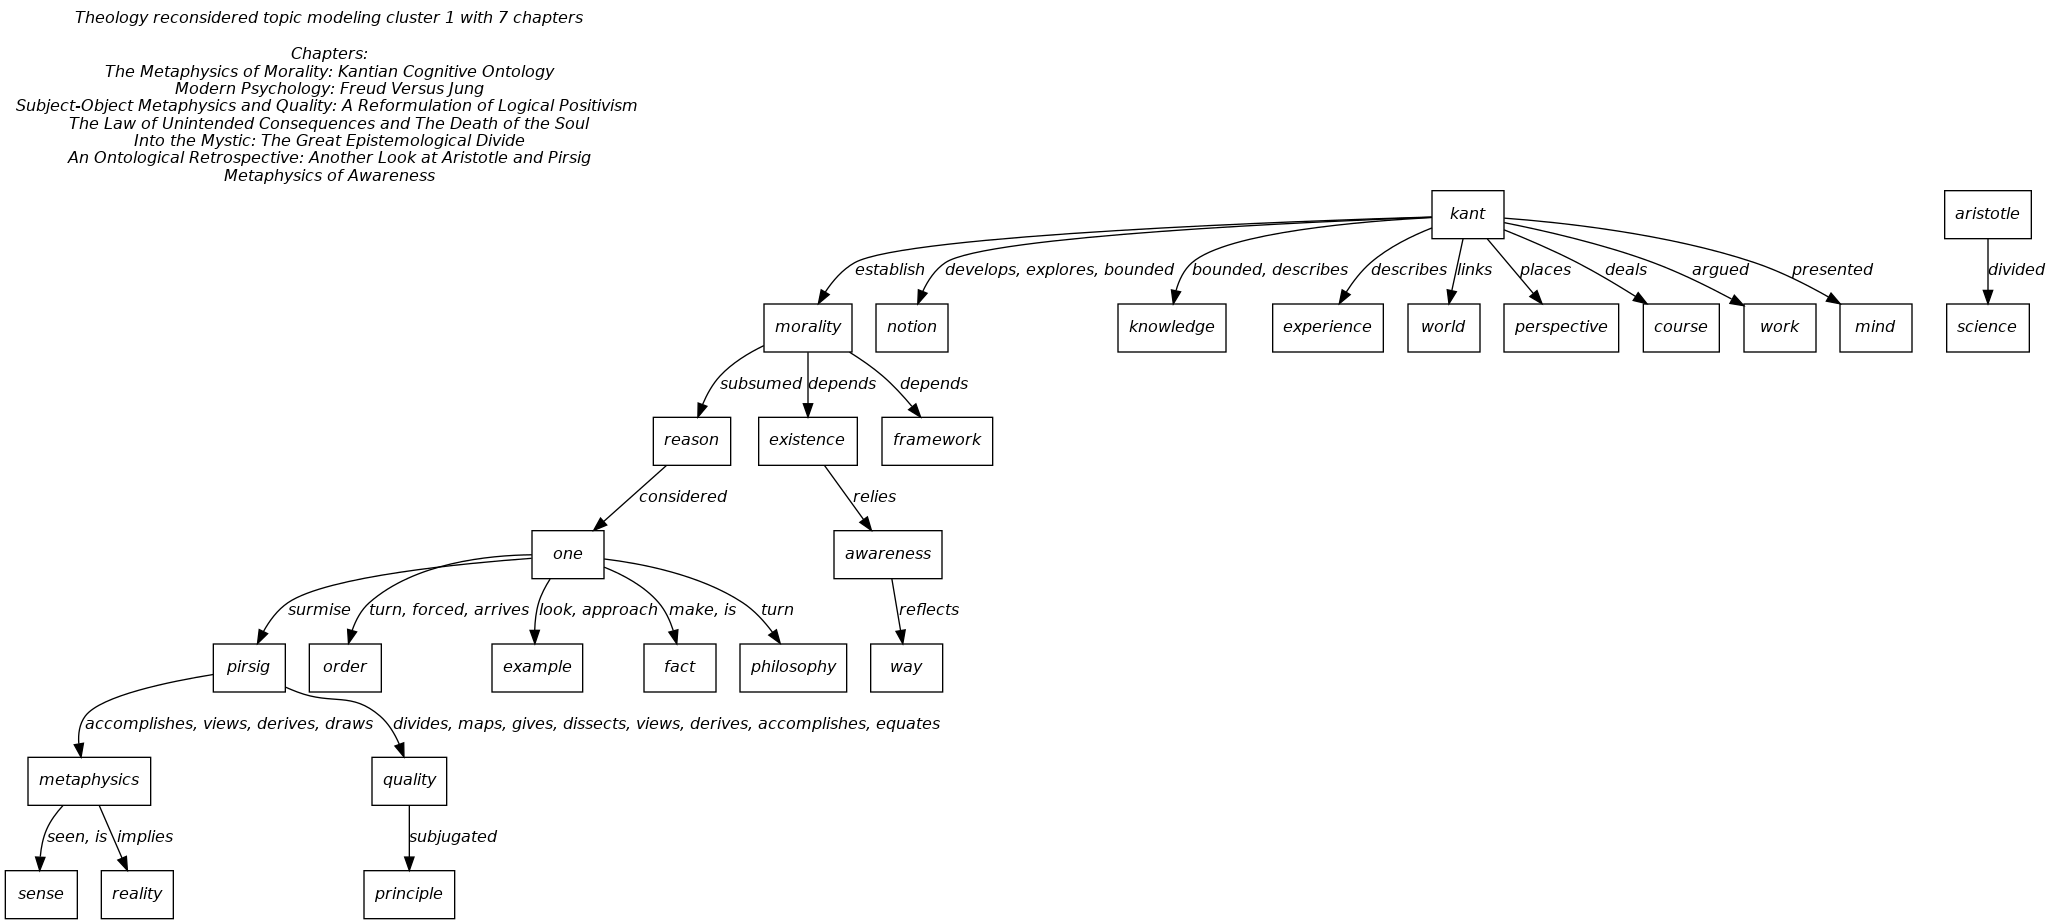

In [6]:
# Specify the chapters used in the analysis.
chosen_cluster = 3
use_key_terms = False

chosen_chapters = clusters[chosen_cluster]

chapter_titles = [titles[i] for i in chosen_chapters]
key_terms = key_terms_per_cluster[chosen_cluster]

print("Chosen chapters ", chosen_chapters)

# Specify the number of top words to use.
n = max(50, len(chosen_chapters) * 5)

text_per_chapter = []
for chapter_idx in chosen_chapters:
    text_per_chapter.append(chapters[chapter_idx])

tf_idf_pre_filtering = get_word_types_with_tf_idf(
    text_per_chapter,
    "tf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=True,
)

if use_key_terms:
    top_n_words = filter_topic_modeling_key_terms(
        key_terms=key_terms_per_cluster[chosen_cluster],
        tf_idf_word_types=tf_idf_pre_filtering,
        verbose=True,
    )

else:
    top_n_words = tf_idf_pre_filtering.head(n)["word"].values

# See difference between top words and key terms.
# print("Top words: ", top_n_words)
# print("Key terms: ", key_terms)
# print("Overlap: ", set(top_n_words).intersection(set(key_terms)))
# print("Symmetric difference: ", set(top_n_words).symmetric_difference(set(key_terms)))


# Create a list of all verses of the chosen books.
all_verses = []
for chapter_idx in chosen_chapters:
    all_verses.extend(sentences_per_chapter[chapter_idx])

# Extract the directed relations.
directed_relations, relations_to_verbs = get_directed_relations(
    top_n_words=top_n_words,
    all_verses=all_verses,
    only_compounds=True,
    verbose=True,
)

# Order the directed relations.
ordered_directed_relations = order_directed_relations(
    directed_relations=directed_relations,
    tf_idf_pre_filtering=tf_idf_pre_filtering,
    order_by="tf_idf",
    include_ordering_wrt_occurences=True,
    verbose=False,
)

# Construct the ontology hierarchy.
ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
    ordered_directed_relations=ordered_directed_relations,
)

# print_hierarchy_tree_from_ontology(
#     ontological_hierarchy=ontology_hierarchy,
#     words_with_parents=words_with_parents,
# )
draw_hierarchy_tree_from_ontology(
    ontological_hierarchy=ontology_hierarchy,
    relations_to_verbs=relations_to_verbs,
    title="Theology reconsidered topic modeling cluster "
    + str(chosen_cluster)
    + " with "
    + str(len(chosen_chapters))
    + " chapters",
    topic_modelling_chapters=chapter_titles,
)

In [6]:
tf_idf_pre_filtering.head(n)

# print the row with word "cross"
tf_idf_pre_filtering[tf_idf_pre_filtering["word"] == "Daodejing"]

,word,word_type,tc,tf,dc,idf,tf_idf


In [7]:
import spacy

nlp = spacy.load("en_core_web_lg")
doc_1 = nlp(all_verses[196])
spacy.displacy.render(doc_1, style="dep", jupyter=True)

## Run for all clusters of the text

/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


Removing the following terms:  ['one', 'well', 'also', 'even']


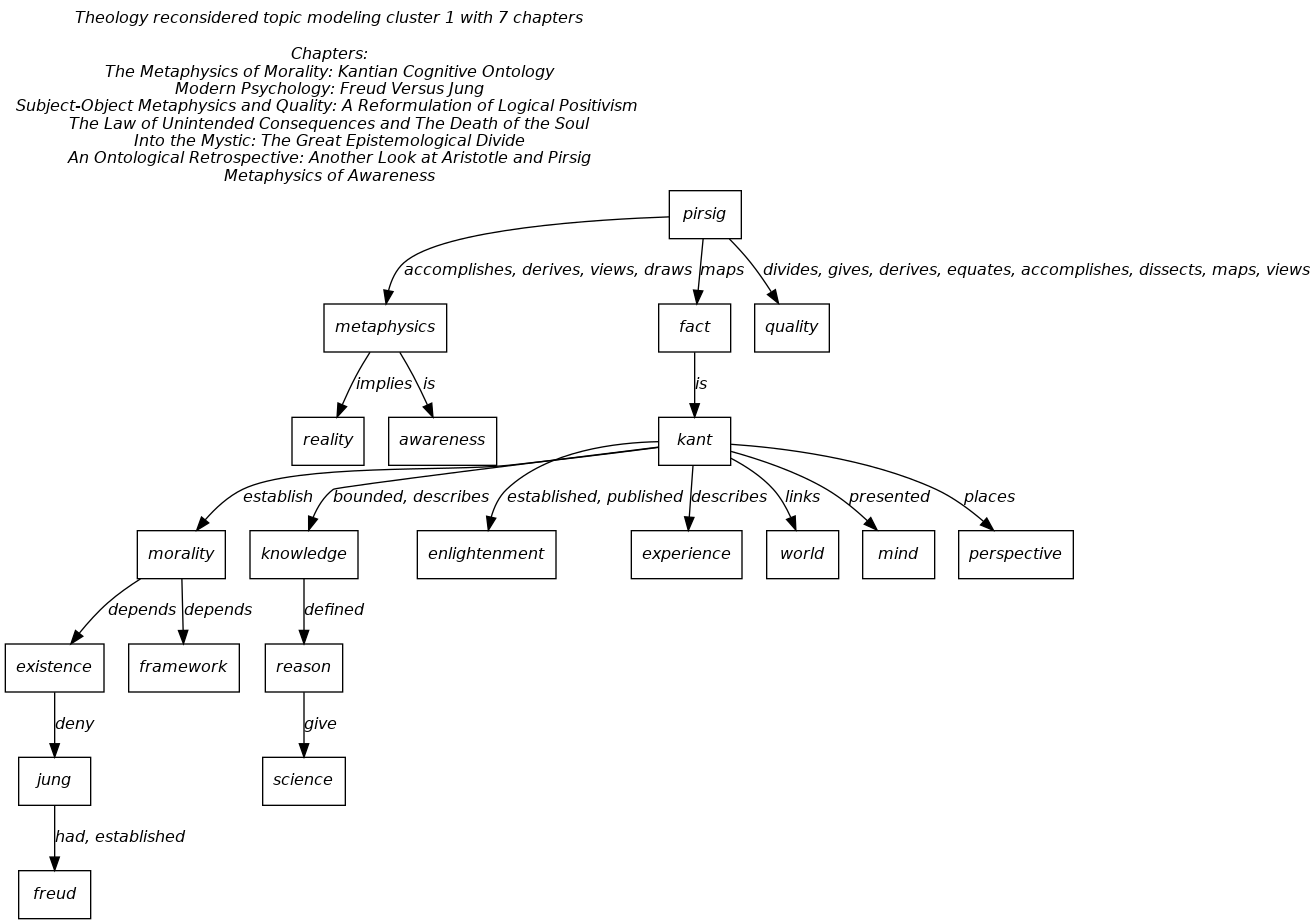

/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


Removing the following terms:  ['suffering', 'one', 'also', 'well', 'theo', 'first', 'theo philosophical', 'form', 'non', 'worship']


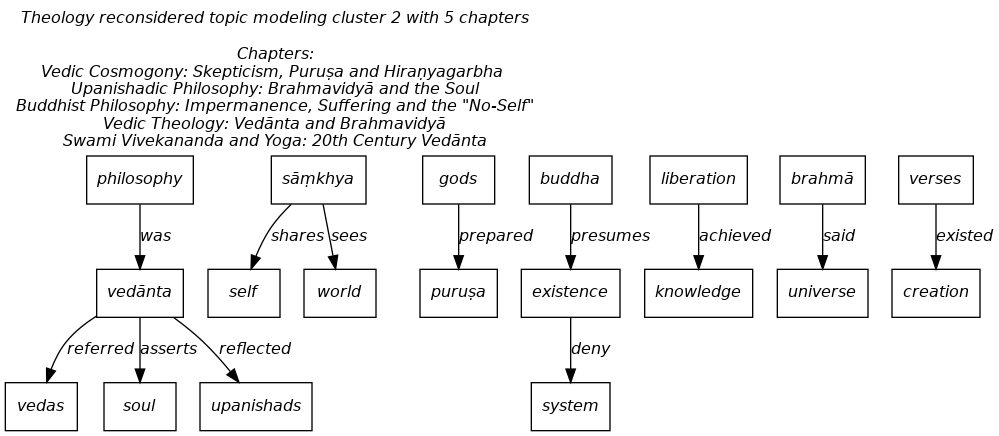

/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


Removing the following terms:  ['one', 'also', 'well', 'first', 'see', 'form', 'eight', 'writing', 'two']


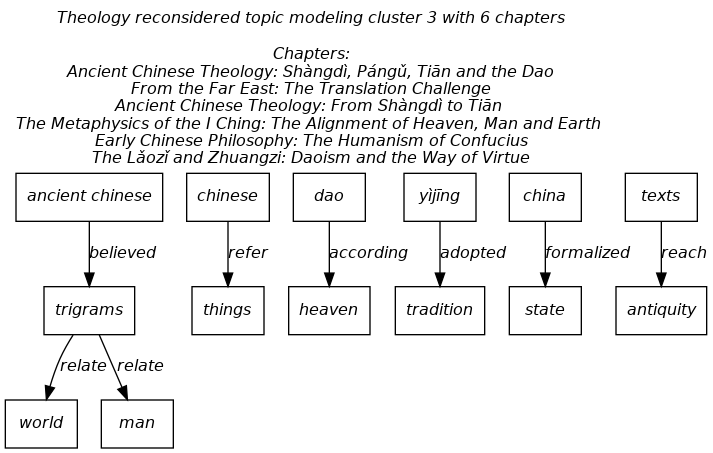

/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


Removing the following terms:  ['one', 'well', 'even', 'defined', 'underlying']


: 

In [8]:
use_key_terms = True

# Specify the chapters used in the analysis.
for cluster in range(1, NUM_TOPICS + 1):
    # print("Cluster: #", cluster)
    chosen_chapters = clusters[cluster]

    chapter_titles = [titles[i] for i in chosen_chapters]
    # print("Chosen chapters \n")
    # for title in chapter_titles:
    #     print(title)

    # Specify the number of top words to use.
    n = max(50, len(chosen_chapters) * 5)

    text_per_chapter = []
    for chapter_idx in chosen_chapters:
        text_per_chapter.append(chapters[chapter_idx])

    tf_idf_pre_filtering = get_word_types_with_tf_idf(
        text_per_chapter,
        "tf",
        skip_stopwords=True,
        include_verbs=False,
        include_determiners=False,
        include_pronouns=False,
        include_adverbs=False,
        include_numbers=False,
    )

    if use_key_terms:
        top_n_words = top_n_words = filter_topic_modeling_key_terms(
            key_terms=key_terms_per_cluster[cluster],
            tf_idf_word_types=tf_idf_pre_filtering,
            verbose=True,
        )
    else:
        top_n_words = tf_idf_pre_filtering.head(n)["word"].values

    # Create a list of all verses of the chosen books.
    all_verses = []
    for chapter_idx in chosen_chapters:
        all_verses.extend(sentences_per_chapter[chapter_idx])
    directed_relations, relations_to_verbs = get_directed_relations(
        top_n_words=top_n_words,
        all_verses=all_verses,
        verbose=False,
    )
    ordered_directed_relations = order_directed_relations(
        directed_relations=directed_relations,
        tf_idf_pre_filtering=tf_idf_pre_filtering,
        order_by="product",
        include_ordering_wrt_occurences=True,
        verbose=False,
    )
    ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
        ordered_directed_relations=ordered_directed_relations,
    )
    # print_hierarchy_tree_from_ontology(
    #     ontological_hierarchy=ontology_hierarchy,
    #     words_with_parents=words_with_parents,
    # )
    draw_hierarchy_tree_from_ontology(
        ontological_hierarchy=ontology_hierarchy,
        relations_to_verbs=relations_to_verbs,
        title="Theology reconsidered topic modeling cluster "
        + str(cluster)
        + " with "
        + str(len(chosen_chapters))
        + " chapters",
        topic_modelling_chapters=chapter_titles,
    )